In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

house=pd.read_csv('house.csv',engine='python',encoding='gbk',names=['小区名称','总价','总价单位','单价','单价单位','户型','楼层','朝向','面积','年份','区域','地点'])
print(house.head(),house.shape)

        小区名称     总价 总价单位     单价  单价单位    户型   楼层   朝向        面积      年份    区域  \
0   世茂运河城尚运苑  368.0    万  26958  元/平米  3室2厅  低楼层  南 北  136.51平米    未知年建    姑苏   
1     阳光水榭花园  190.0    万  21215  元/平米  2室1厅  中楼层    南   89.56平米  2006年建    吴中   
2     湖岸名家南区  155.0    万  20946  元/平米  2室2厅  低楼层    南      74平米  2007年建    吴中   
3       香城颐园  200.0    万  22334  元/平米  2室2厅  低楼层  南 北   89.55平米  2012年建    相城   
4  雅戈尔YAKR公馆  440.0    万  41084  元/平米  2室2厅  高楼层    南   107.1平米  2008年建  工业园区   

     地点  
0  沧浪新城  
1    城南  
2    郭巷  
3    元和  
4    玲珑   (3000, 12)


In [2]:
#判断整个数据中是否存在缺失数据
isNull=np.any(house.isnull())==True
isNull

False

In [3]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
小区名称    3000 non-null object
总价      3000 non-null float64
总价单位    3000 non-null object
单价      3000 non-null int64
单价单位    3000 non-null object
户型      3000 non-null object
楼层      3000 non-null object
朝向      3000 non-null object
面积      3000 non-null object
年份      3000 non-null object
区域      3000 non-null object
地点      3000 non-null object
dtypes: float64(1), int64(1), object(10)
memory usage: 281.3+ KB


In [4]:
#不同区域的单价平均值
region_price=pd.DataFrame()
region_price['最低价']=house['单价'].groupby(house['区域']).min()
region_price['均价']=house['单价'].groupby(house['区域']).mean()
region_price['最高价']=house['单价'].groupby(house['区域']).max()
region_price

,最低价,均价,最高价
区域,,,
吴中,10455,22555.923200,43715
吴江,9391,18436.982906,28847
姑苏,10136,22863.563025,45334
工业园区,11504,35382.344432,82540
昆山,9471,19574.060606,40761
相城,8959,20493.452328,34445
高新,12772,25751.764463,52024


In [5]:
avg_price=region_price['均价'].mean()
avg_price

23579.72727998727

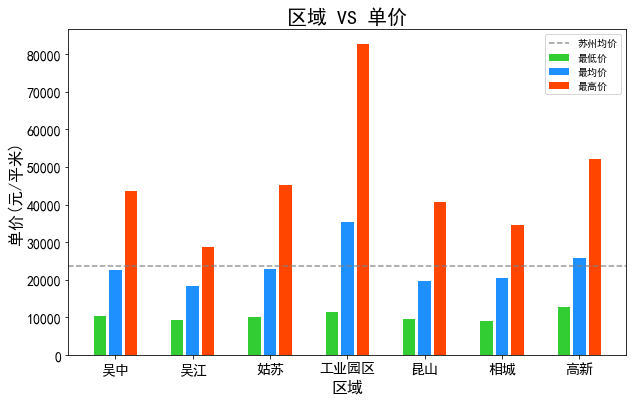

In [6]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False

plt.figure(figsize=(10,6))
plt.title('区域 VS 单价',fontsize=20)
min_x = range(1, 33, 5)
avg_x = range(2, 34, 5)
max_x = range(3, 35, 5)
plt.bar(min_x,region_price['最低价'],color='limegreen', label='最低价')
plt.bar(avg_x,region_price['均价'],color='dodgerblue', label='最均价')
plt.bar(max_x,region_price['最高价'],color='orangered', label='最高价')
plt.xticks(range(2, 34, 5), region_price.index, fontsize=14)
plt.xlabel('区域',fontsize=16)
plt.ylabel('单价(元/平米)',fontsize=16)
plt.tick_params(labelsize=14)
plt.axhline(avg_price,label="苏州均价",color='gray',linestyle="--",alpha=0.8)
plt.legend()
plt.show()

In [7]:
#工业园区不同地点的房价分布
house2=house[house['区域']=="工业园区"]
place_price=pd.DataFrame()
place_price['最低价']=house2['单价'].groupby(house['地点']).min()
place_price['均价']=house2['单价'].groupby(house['地点']).mean()
place_price['最高价']=house2['单价'].groupby(house['地点']).max()
place_price

,最低价,均价,最高价
地点,,,
东沙湖,22470,37504.373832,54591
东环,14034,23445.460526,45334
双湖,29008,43560.684211,59460
唯亭,15594,18802.800000,21361
娄葑,15758,22634.340000,50710
斜塘,19850,28875.840000,34775
湖东,17386,36691.821622,63167
湖东CBD,24303,36935.123894,82540
湖西CBD,23321,45086.111111,77875


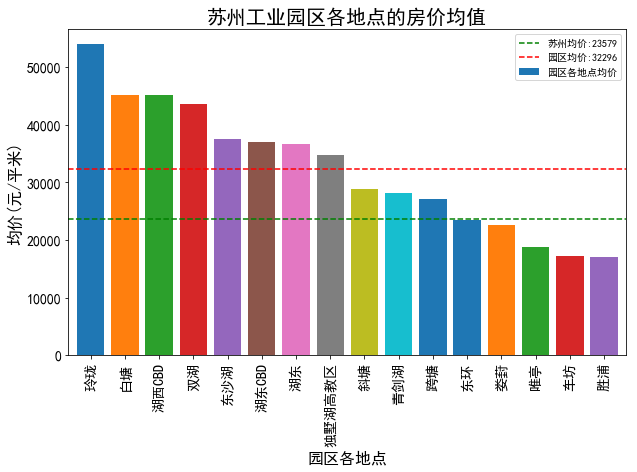

In [8]:
place_avgprice=place_price['均价'].sort_values(ascending=False)
yuanqu_avgprice=place_price['均价'].mean()
plt.figure(figsize=(10,6))
plt.title('苏州工业园区各地点的房价均值',fontsize=20)
plt.axhline(avg_price,color='green',linestyle="--",label="苏州均价:%d"%int(avg_price))
plt.axhline(yuanqu_avgprice,color='red',linestyle="--",label="园区均价:%d"%int(yuanqu_avgprice))
place_avgprice.plot(kind='bar',width=0.8,label='园区各地点均价')
plt.tick_params(labelsize=14)
plt.ylabel('均价(元/平米)',fontsize=16)
plt.xlabel('园区各地点',fontsize=16)
plt.legend()
plt.show()

In [9]:
#不同区域二手房的数量
house_num=pd.DataFrame()
house_num['数量']=house['小区名称'].groupby(house['区域']).count()
house_num['比例']=house_num['数量']/house_num['数量'].sum()*100
house_num

,数量,比例
区域,,
吴中,625,20.833333
吴江,117,3.900000
姑苏,595,19.833333
工业园区,871,29.033333
昆山,99,3.300000
相城,451,15.033333
高新,242,8.066667


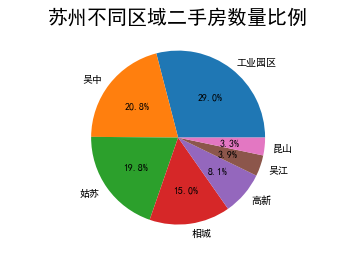

In [14]:
house_ratio=house_num['比例'].sort_values(ascending=False)
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False
plt.title('苏州不同区域二手房数量比例',fontsize=20)
plt.axis('equal')
plt.pie(house_ratio,labels=house_ratio.index,autopct = '%3.1f%%')
plt.show()